### **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Loading Data**

In [2]:
data=pd.read_csv("Flood-Detection.csv")
print(data)

                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4110                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4111                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4112                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4113                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4114                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP  

### **EDA**

In [3]:
data.shape

(4115, 20)

In [4]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,FLOODS
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,yes
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,yes
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,No
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,yes
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,No


In [5]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,FLOODS
4110,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6,No
4111,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1,No
4112,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,No
4113,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,No
4114,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4,No


In [6]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'FLOODS'],
      dtype='object')

### Column Summary

    1) SUBDIVISION: The geographical subdivision or region.
    2) YEAR: The year for the recorded data.
    3) JAN to DEC: Monthly rainfall data (likely in millimeters).
    4) ANNUAL: Total annual rainfall.
    5) Jan-Feb: Total rainfall for January and February.
    6) Mar-May: Total rainfall for March, April, and May.
    7) Jun-Sep: Total rainfall for June, July, August, and September.
    8) Oct-Dec: Total rainfall for October, November, and December.
    9) FLOODS: Information related to flood occurrences (possibly a binary indicator or count of flood events).

In [7]:
# removing unnecessary  columns

data = data.drop('YEAR', axis=1)

In [8]:
# Checking null values

data.isna().sum()

SUBDIVISION     0
JAN             4
FEB             3
MAR             5
APR             3
MAY             2
JUN             4
JUL             6
AUG             3
SEP             5
OCT             6
NOV            10
DEC             9
ANNUAL         25
Jan-Feb         6
Mar-May         8
Jun-Sep         9
Oct-Dec        12
FLOODS          0
dtype: int64

In [9]:
# Filling null values to mean values

data['JAN'].fillna(data['JAN'].mean(), inplace=True)
data['FEB'].fillna(data['FEB'].mean(), inplace=True)
data['MAR'].fillna(data['MAR'].mean(), inplace=True)
data['APR'].fillna(data['APR'].mean(), inplace=True)
data['MAY'].fillna(data['MAY'].mean(), inplace=True)
data['JUN'].fillna(data['JUN'].mean(), inplace=True)
data['JUL'].fillna(data['JUL'].mean(), inplace=True)
data['AUG'].fillna(data['AUG'].mean(), inplace=True)
data['SEP'].fillna(data['SEP'].mean(), inplace=True)
data['OCT'].fillna(data['OCT'].mean(), inplace=True)
data['NOV'].fillna(data['NOV'].mean(), inplace=True)
data['DEC'].fillna(data['DEC'].mean(), inplace=True)
data['ANNUAL'].fillna(data['ANNUAL'].mean(), inplace=True)
data['Jan-Feb'].fillna(data['Jan-Feb'].mean(), inplace=True)
data['Mar-May'].fillna(data['Mar-May'].mean(), inplace=True)
data['Jun-Sep'].fillna(data['Jun-Sep'].mean(), inplace=True)
data['Oct-Dec'].fillna(data['Oct-Dec'].mean(), inplace=True)

In [10]:
data.isna().sum()

SUBDIVISION    0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
FLOODS         0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4115 non-null   object 
 1   JAN          4115 non-null   float64
 2   FEB          4115 non-null   float64
 3   MAR          4115 non-null   float64
 4   APR          4115 non-null   float64
 5   MAY          4115 non-null   float64
 6   JUN          4115 non-null   float64
 7   JUL          4115 non-null   float64
 8   AUG          4115 non-null   float64
 9   SEP          4115 non-null   float64
 10  OCT          4115 non-null   float64
 11  NOV          4115 non-null   float64
 12  DEC          4115 non-null   float64
 13  ANNUAL       4115 non-null   float64
 14  Jan-Feb      4115 non-null   float64
 15  Mar-May      4115 non-null   float64
 16  Jun-Sep      4115 non-null   float64
 17  Oct-Dec      4115 non-null   float64
 18  FLOODS       4115 non-null   object 
dtypes: flo

In [13]:
data.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,18.952396,21.808828,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.746362,155.901753,1064.724769,154.100487
std,33.571640,35.900055,46.930879,67.806432,123.204945,234.596627,269.343042,188.701637,135.326035,99.446536,68.601881,42.323241,901.096128,59.272155,201.121131,706.966961,166.699007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,0.600000,0.600000,1.000000,3.000000,8.600000,70.450000,175.900000,156.100000,100.600000,14.600000,0.700000,0.100000,806.400000,4.100000,24.200000,574.350000,34.200000
50%,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.800000,259.400000,174.100000,65.700000,9.700000,3.100000,1124.700000,19.300000,75.200000,882.000000,98.700000
75%,22.100000,26.800000,31.250000,49.850000,96.950000,305.000000,418.250000,377.750000,265.750000,148.300000,45.850000,17.700000,1635.300000,50.300000,196.900000,1287.600000,212.700000
max,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [14]:
data.nunique()

SUBDIVISION      36
JAN             803
FEB             899
MAR             979
APR            1235
MAY            1732
JUN            2723
JUL            3051
AUG            2914
SEP            2633
OCT            1940
NOV            1240
DEC             802
ANNUAL         3713
Jan-Feb        1221
Mar-May        2263
Jun-Sep        3684
Oct-Dec        2390
FLOODS            2
dtype: int64

### LOCATIONS

In [15]:
for i in data['SUBDIVISION'].unique(): 
    print(i)

ANDAMAN & NICOBAR ISLANDS
ARUNACHAL PRADESH
ASSAM & MEGHALAYA
NAGA MANI MIZO TRIPURA
SUB HIMALAYAN WEST BENGAL & SIKKIM
GANGETIC WEST BENGAL
ORISSA
JHARKHAND
BIHAR
EAST UTTAR PRADESH
WEST UTTAR PRADESH
UTTARAKHAND
HARYANA DELHI & CHANDIGARH
PUNJAB
HIMACHAL PRADESH
JAMMU & KASHMIR
WEST RAJASTHAN
EAST RAJASTHAN
WEST MADHYA PRADESH
EAST MADHYA PRADESH
GUJARAT REGION
SAURASHTRA & KUTCH
KONKAN & GOA
MADHYA MAHARASHTRA
MATATHWADA
VIDARBHA
CHHATTISGARH
COASTAL ANDHRA PRADESH
TELANGANA
RAYALSEEMA
TAMIL NADU
COASTAL KARNATAKA
NORTH INTERIOR KARNATAKA
SOUTH INTERIOR KARNATAKA
KERALA
LAKSHADWEEP


FLOODS
No     3756
yes     359
Name: count, dtype: int64


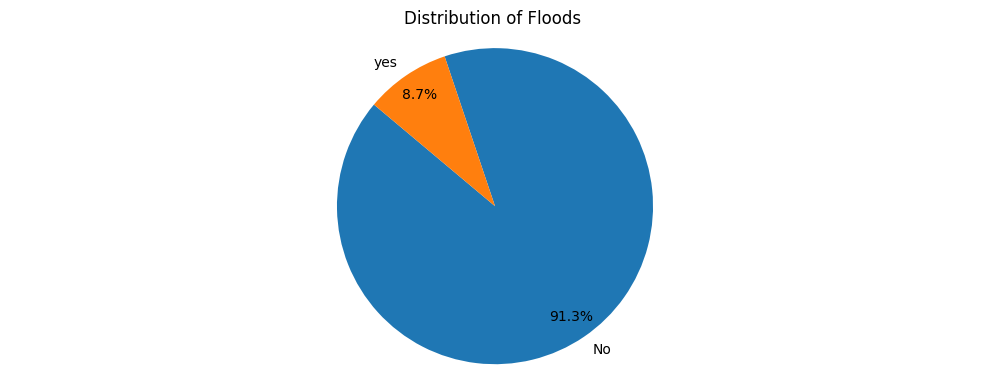

In [16]:
print(data['FLOODS'].value_counts())
Flood_counts = data['FLOODS'].value_counts()
plt.figure(figsize=(10, 4))
plt.pie(Flood_counts, labels=Flood_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Floods ')
plt.axis('equal')  
plt.tight_layout()  
plt.show()


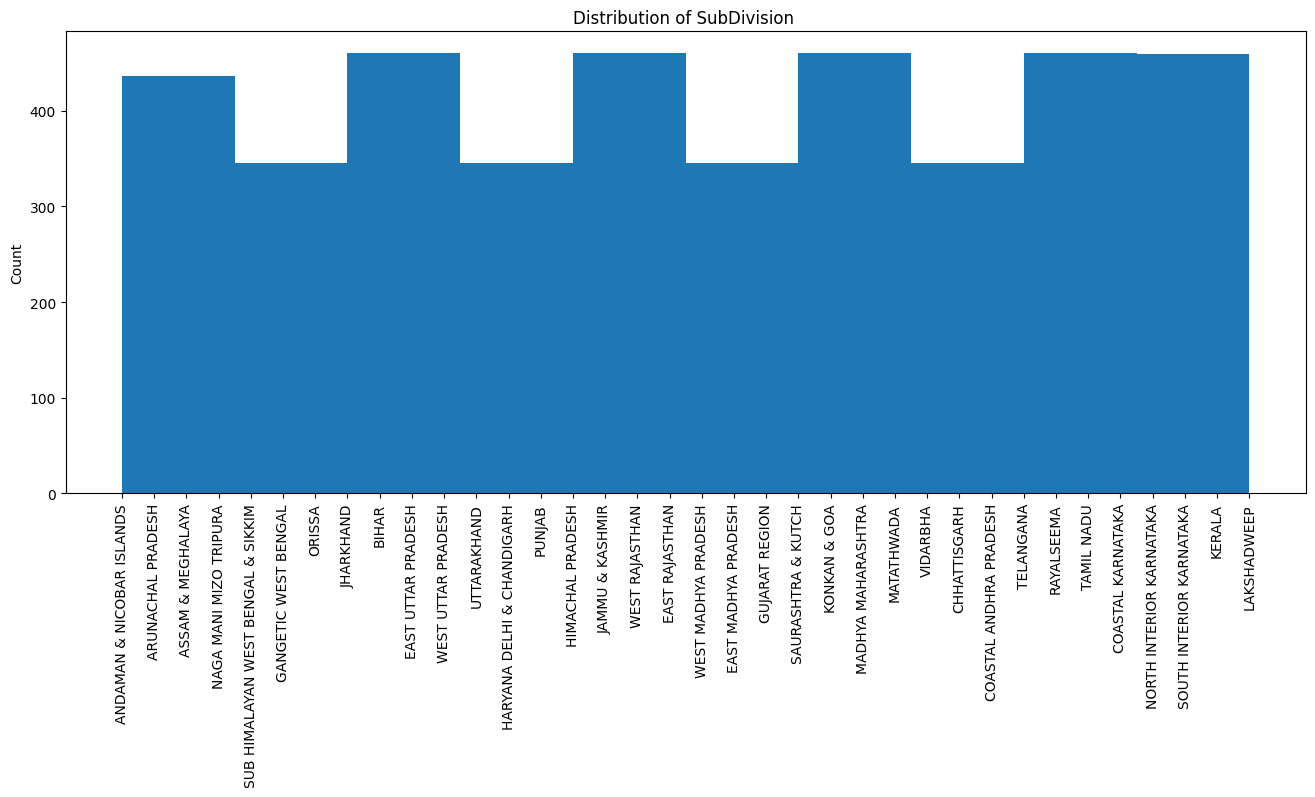

In [17]:
x=data['SUBDIVISION']
plt.figure(figsize=(16,6))
plt.hist(x)
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title('Distribution of SubDivision ')
plt.show()

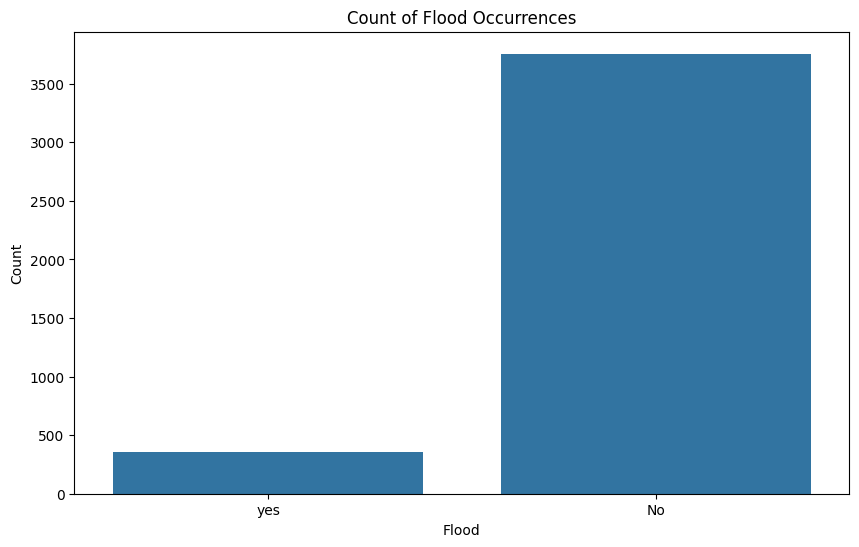

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FLOODS', data=data)
plt.title('Count of Flood Occurrences')
plt.xlabel('Flood')
plt.ylabel('Count')
plt.show()

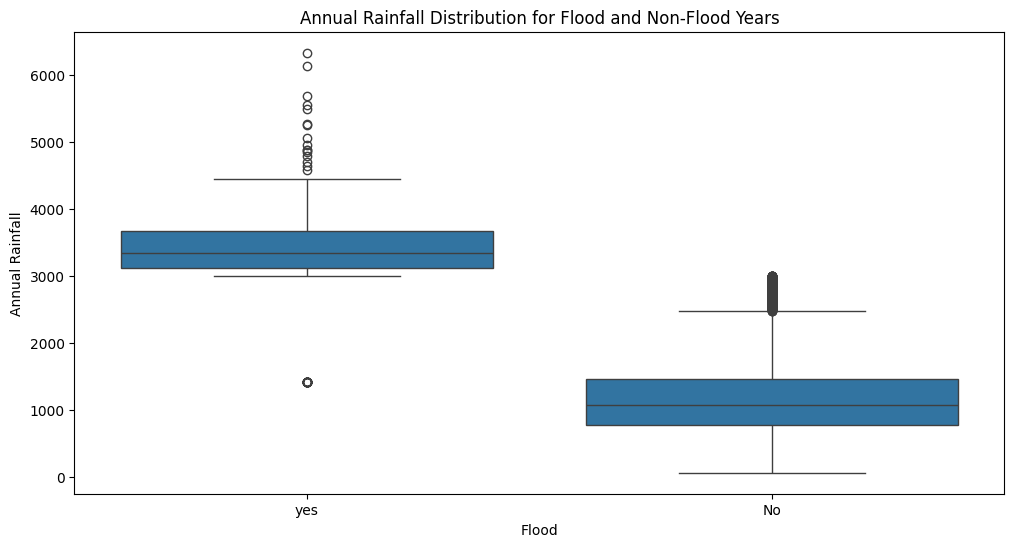

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FLOODS', y='ANNUAL', data=data)
plt.title('Annual Rainfall Distribution for Flood and Non-Flood Years')
plt.xlabel('Flood')
plt.ylabel('Annual Rainfall')
plt.show()


In [20]:
corr=data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].corr()

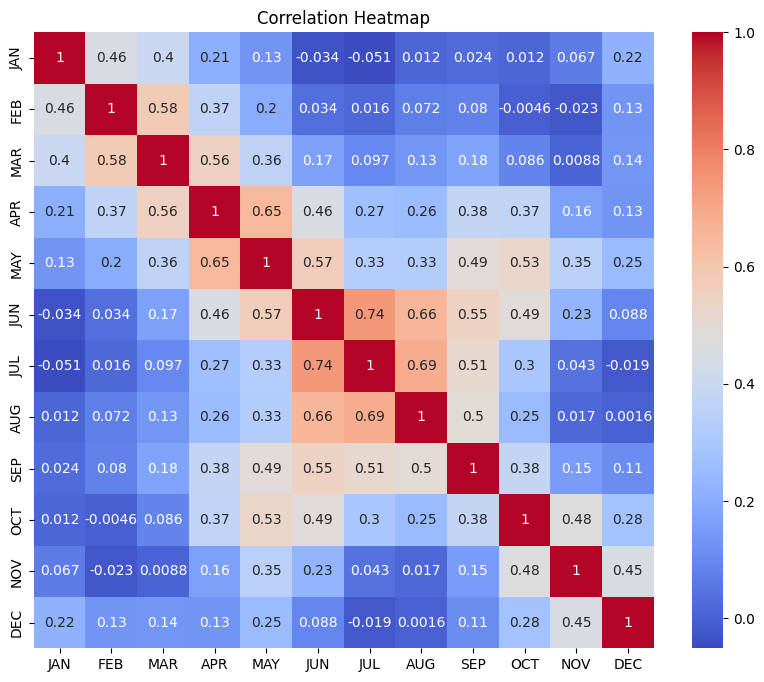

In [21]:
plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['SUBDIVISION'] = label_encoder.fit_transform(data['SUBDIVISION'])

In [23]:
from sklearn.preprocessing import LabelEncoder

X = data.drop('FLOODS', axis=1)
y = data['FLOODS']


### **Logistic Regression Model**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9088699878493317


In [25]:
# Calculating training accuracy for Logistic Regression
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Logistic Regression Training Accuracy:", train_accuracy)

Logistic Regression Training Accuracy: 0.9246658566221142


In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

Confusion Matrix:
 [[706  37]
 [ 38  42]]

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.95      0.95       743
         yes       0.53      0.53      0.53        80

    accuracy                           0.91       823
   macro avg       0.74      0.74      0.74       823
weighted avg       0.91      0.91      0.91       823



### **Random Forest ModeL**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)

classification_rep_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", classification_rep_rf)


Accuracy: 0.991494532199271

Confusion Matrix:
 [[743   0]
 [  7  73]]

Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00       743
         yes       1.00      0.91      0.95        80

    accuracy                           0.99       823
   macro avg       1.00      0.96      0.97       823
weighted avg       0.99      0.99      0.99       823



In [28]:
# Calculating training accuracy for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)


Random Forest Training Accuracy: 1.0


### **Decision Tree Model**

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", conf_matrix_dt)

classification_rep_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report:\n", classification_rep_dt)

Accuracy: 0.9987849331713244

Confusion Matrix:
 [[742   1]
 [  0  80]]

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       743
         yes       0.99      1.00      0.99        80

    accuracy                           1.00       823
   macro avg       0.99      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823



In [30]:
# Calculating training accuracy for Random Forest
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print("Random Forest Training Accuracy:", train_accuracy_dt)

Random Forest Training Accuracy: 1.0


### **Support vector Machine model**

In [36]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)

classification_rep_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report:\n", classification_rep_svm)

Accuracy: 0.9854191980558931

Confusion Matrix:
 [[742   1]
 [ 11  69]]

Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99       743
         yes       0.99      0.86      0.92        80

    accuracy                           0.99       823
   macro avg       0.99      0.93      0.96       823
weighted avg       0.99      0.99      0.98       823



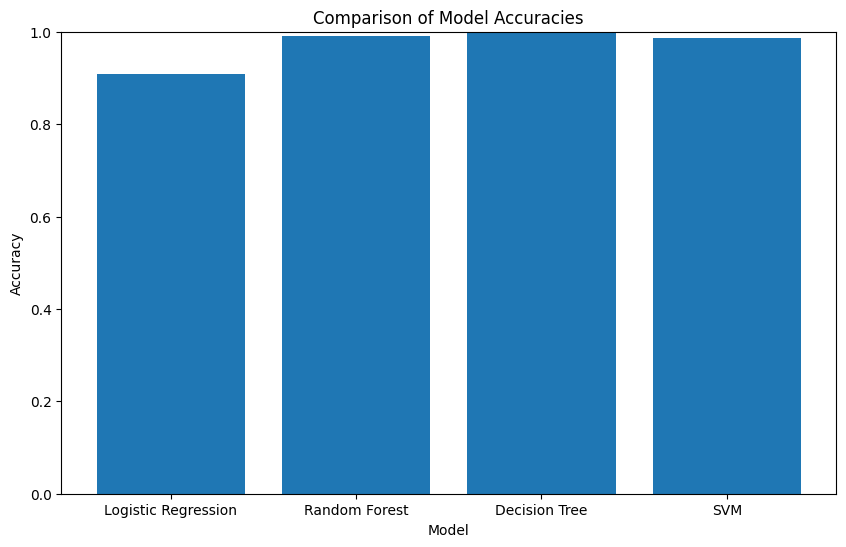

In [38]:
model_accuracies = {
    'Logistic Regression': accuracy,
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm 
}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) 
plt.show()

**Performance of Models**: The project demonstrates that the Random Forest model, Decision Tree & SVM outperforms the Logistic Regression model in predicting flood occurrence, with an accuracy above of 99.1%.